# Ejercicio 3 - guía 5

Sean 𝑋1, . . . , 𝑋𝑛 variables aleatorias Normales(𝜇, 1). Sea 𝜃 = (𝑒^𝜇) y sea 𝜃∗ = (𝑒^𝑋) . Crear un conjunto
de datos utilizando 𝜇 = 5 que tenga 𝑛 = 100 observaciones.

## a)
Utilizar bootstrap para obtener el error estándar y el intervalo de confianza del 95% para 𝜃.

### Desarrollo

Primero genero las 100 observaciones:

In [1]:
from scipy.stats import norm 
import numpy as np

# Planto la semilla para que los resultados sean reproducibles
np.random.seed(19)

mu = 5
n_observaciones = 100
observaciones = np.random.normal(loc=mu, scale=1, size= n_observaciones)
observaciones = (observaciones, )

Defino la función que usaré para calcular el IC con bootstrap:

In [2]:
theta_sombrero = lambda x: np.exp(np.mean(x))

Este sería el valor del 𝜃 estimado:

In [3]:
print(theta_sombrero(observaciones))

152.06735774278906


Ahora si calculo el intervalo de confianza y su error estándar usando el método percentile:

In [4]:
from scipy.stats import bootstrap

bs_percentile = bootstrap(observaciones, theta_sombrero, n_resamples=10000, method='percentile')

print(f'Error estándar de 𝜃*: {bs_percentile.standard_error}')
cota_inferior = bs_percentile.confidence_interval.low
cota_superior = bs_percentile.confidence_interval.high
print(f'Intervalo de confianza del 95% usando el método percentile: [{cota_inferior}, {cota_superior}]')

Error estándar de 𝜃*: 13.053453215318642
Intervalo de confianza del 95% usando el método percentile: [128.65867853453204, 179.30753053012353]


## b)
Graficar histograma de las replicaciones bootstrap. Esto es una estimación de la distribución
de 𝜃. Comparar con la verdadera distribución de muestreo de 𝜃.

### Desarrollo

Ahora armo un gráfico comparativo del histograma de las replicaciones bootstrap contra la verdadera distribución de muestreo de 𝜃:

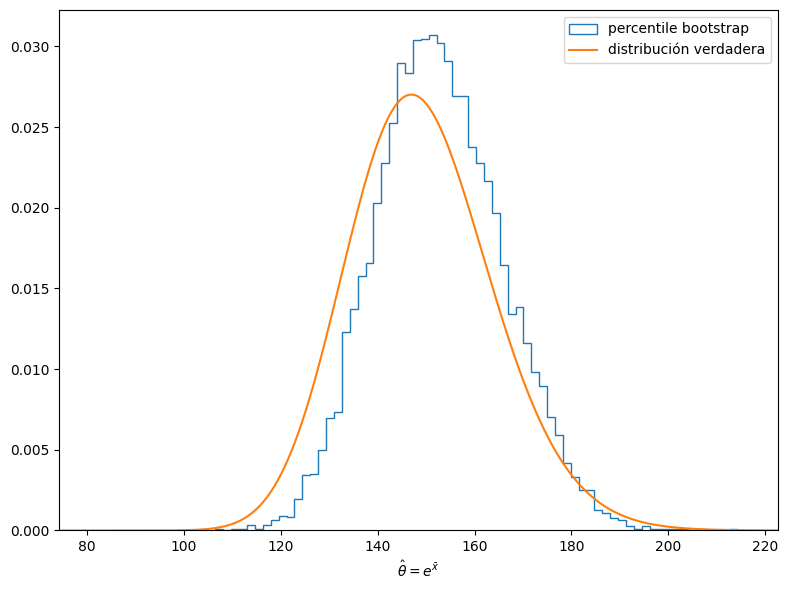

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

x = np.linspace(mu-10,mu+10,10000)
ax.hist(bs_percentile.bootstrap_distribution, density=True, bins='auto', histtype='step', label='percentile bootstrap')
norm_pdf = norm.pdf(x, loc=mu, scale=np.sqrt(1/n_observaciones))
ax.plot(np.exp(x), norm_pdf/np.exp(x), label='distribución verdadera')
ax.set_xlim(np.exp(mu)*0.5, np.exp(mu)*1.5)
ax.set_xlabel(r'$\hat{\theta}=e^{\bar{x}}$')
ax.legend()
plt.tight_layout() 
plt.show()